In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

In [28]:
data = pd.read_csv("/Users/c088259/Downloads/datasets_3681_5854_breastCancer.csv")

In [29]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [32]:
#Descriptive Statistics of data set
data.shape
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [121]:
#Data Cleaning
column_names=data.columns


In [38]:
#Checking the cloumn value in bare_nucleoli
data.bare_nucleoli.unique()
data.bare_nucleoli.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [42]:
#We can see from the above output that the values in bare_nucleoli are having "?". We need to impute those values

data =data[data.bare_nucleoli!="?"]

#Changing the data type of the column
data.bare_nucleoli =data.bare_nucleoli.astype("int64")
data.dtypes

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [46]:
#Checking for null values in the dataset
data.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [66]:
data['class']=data['class'].map({2:0,4:1}).astype('int64')

In [67]:
#Sampling of the dataset
data= data.sample(frac=1)
data.reset_index(drop=True,inplace=True)
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,320675,3,3,5,2,3,10,7,1,1,1
1,1174131,10,10,10,2,10,10,5,3,3,1
2,1058849,5,1,1,1,2,1,1,1,1,0
3,1073960,10,10,10,10,6,10,8,1,5,1
4,1298360,1,1,1,1,2,1,1,1,1,0


In [ ]:
#Data Visulization

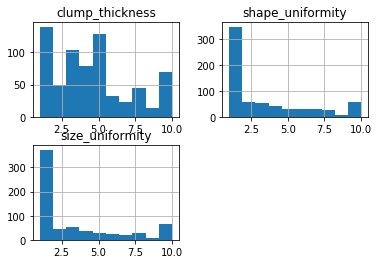

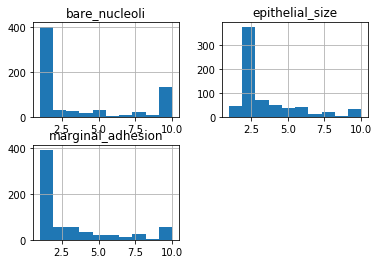

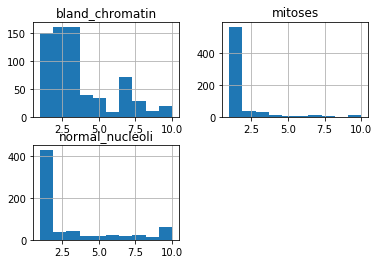

In [71]:
#Understanding the datasets by plotting histogram on each variable except Id and target variable class.

%matplotlib inline
data2=data[data['class']==2]
data4=data[data['class']!=2]
data[column_names[1:4]].hist()
data[column_names[4:7]].hist()
data[column_names[7:10]].hist()
plt.show()

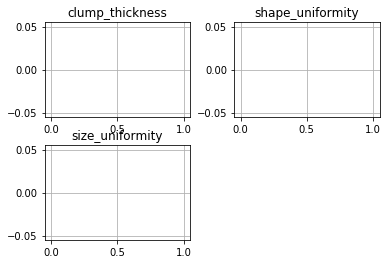

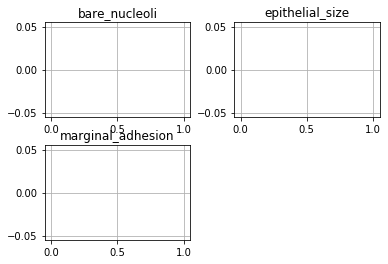

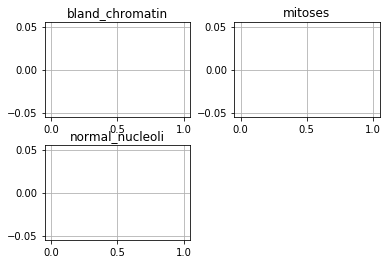

In [74]:
#Visualising the histogram of patients who are identified as benign class value is 2 
#showing normality in the data with no cancer symptoms
data2[column_names[1:4]].hist()
data2[column_names[4:7]].hist()
data2[column_names[7:10]].hist()
plt.show()

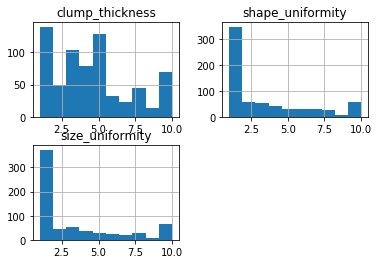

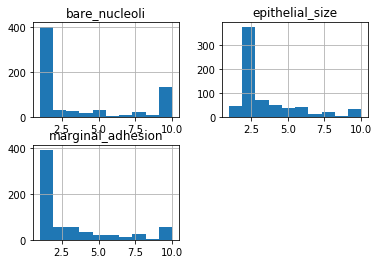

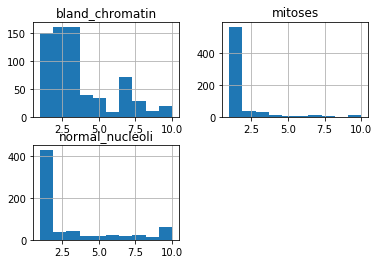

In [75]:
#Visualising the histogram of patients who are identified as malignant class value is 4
data4[column_names[1:4]].hist()
data4[column_names[4:7]].hist()
data4[column_names[7:10]].hist()
plt.show()

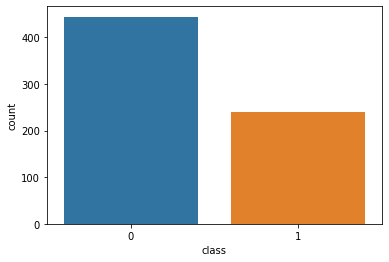

In [111]:
#Bar Plot of the diagnosis 'Class' variable ,where we can se more Benign Patients than Malignant.
X=data[predictors]
y = data['class']
ax= sns.countplot(y,label="Count")



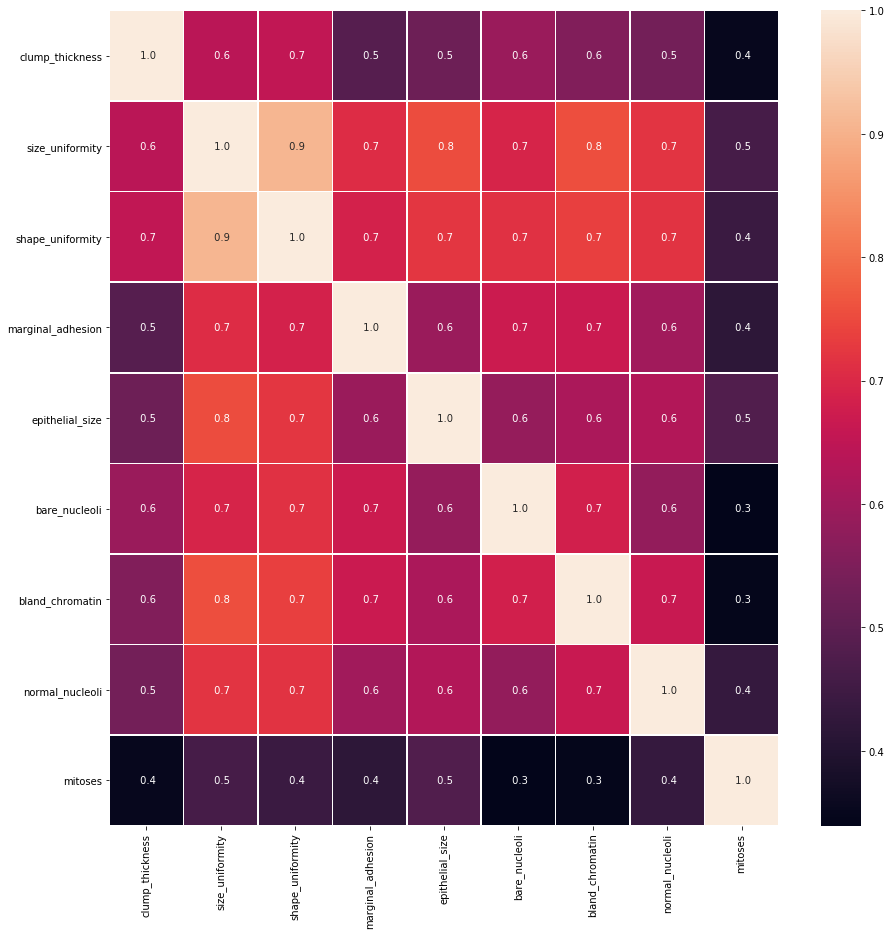

In [116]:
#Correlation Map to understand the correlation between all the predictor variables
x=data[predictors]
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(x.corr(),annot=True,linewidths=0.5,fmt=' .1f',ax=ax)
plt.show()

In [80]:
#Data Modeling
#Chosing predictors in order to predict the target variable class. 
#Dropping Id and class column to avoid overfitting of the model

predictors = column_names[1:10]
X=data[predictors]
y = data['class']




In [88]:
#Random forest Classification
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=200,max_features=None)
clf.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
clf.feature_importances_

array([1.47476050e-02, 6.21352065e-01, 2.11235104e-01, 8.60632981e-04,
       4.97280724e-03, 1.08756023e-01, 3.17615032e-02, 6.20672727e-03,
       1.07532034e-04])

In [102]:
#Random Forest Classification Model
#Cross Validating and model fitting
from sklearn.model_selection import cross_validate 
#Generate cross validation for the dataset. It will return the row indices corresponding to train and test
#We set random state to ensure we get the same splits every time we run this
scores = cross_validate(clf, X, y, cv=3,
                         scoring=('r2', 'precision'),
                         return_train_score=True)
print(scores['test_precision'])

[0.96103896 0.91566265 0.91666667]


In [92]:
clf_improved = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=500,max_features=None)

In [101]:
scores_random_forest = cross_validate(clf_improved, X, y, cv=3,
                         scoring=('r2', 'precision'),
                         return_train_score=True)
print(scores_random_forest['test_precision'])

[0.96052632 0.91566265 0.92771084]


In [100]:
#Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
scores_decision_tree = cross_validate(decisionTreeClassifier, X, y, cv=3,
                         scoring=('r2', 'precision'),
                         return_train_score=True)
print(scores_decision_tree['test_precision'])

[0.93670886 0.90361446 0.92682927]


In [118]:
#AdaBoost Classification Model
adaboostClassifier = AdaBoostClassifier(n_estimators=100,base_estimator=decisionTreeClassifier,learning_rate=0.1)
scores_adaboost = cross_validate(adaboostClassifier, X, y, cv=3,
                         scoring=('r2', 'precision'),
                         return_train_score=True)
print(scores_adaboost['test_precision'])

[0.93670886 0.89156627 0.92592593]


In [120]:
#Gradient Boosting Classification Model
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,max_depth=2)
scores_gradientboost = cross_validate(gradientBoostingClassifier, X, y, cv=3,
                         scoring=('r2', 'precision'),
                         return_train_score=True)
print(scores_gradientboost['test_precision'])

[0.96153846 0.90123457 0.92941176]


Model Evaluation
From the above 5 models used we can see that Gradient Boosting Classification Model has more precision than decision tree and other classification models. So we can use this model to classify and forecast the diagnosis of the patients whether they are Benign or Malignant.

In [ ]:
#Importing readcsvfile Function from .py file

from readCSVFile import function1